<a href="https://colab.research.google.com/github/yasna21/Exploratory-Data-Analysis-EDA-/blob/main/Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from datetime import date, datetime

In [ ]:
companies_df = pd.read_csv("/content/drive/MyDrive/Copy of Unicorn_Companies.csv")

# Step 2: Data Exploration

In [ ]:
companies_df.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


# New Section

In [ ]:
companies_df.shape

(1074, 10)

### Remove Duplicates

In [ ]:
companies_df.drop_duplicates().shape

(1074, 10)

1074 recordes within this dataset.

### Explore genral information about dataset

In [ ]:
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


### Check the types of data

In [ ]:
companies_df.dtypes

,0
Company,object
Valuation,object
Date Joined,object
Industry,object
City,object
Country/Region,object
Continent,object
Year Founded,int64
Funding,object
Select Investors,object


# Step 3: Handale Missing Values

In [ ]:
companies_df['Funding'] = companies_df['Funding'].fillna('0B')

We filled the missing values of funding column with 0B

In [ ]:
companies_df['City'] = companies_df['City'].fillna('Unknown')

In [ ]:
companies_df['Select Investors'] = companies_df['Select Investors'].fillna('Unknown')

In [ ]:
companies_df["Industry"] = companies_df["Industry"].fillna("Unknown")

# Check: Is there more missing values?

In [ ]:
companies_df.isnull().sum()

,0
Company,0
Valuation,0
Date Joined,0
Industry,0
City,0
Country/Region,0
Continent,0
Year Founded,0
Funding,0
Select Investors,0


There is no more missing values

# Step 4: Data Cleaning the data

In [ ]:
# Create a function to do cleaning tasks.
def cleaning_data(value):
    if isinstance(value, str):
        if 'B' in value:
            return float(value.replace ('B', '').replace('$', ''))
        elif 'M' in value:
            return float(value.replace('M', '').replace('$', '')) / 1000
    return 0
companies_df['Valuation']= companies_df['Valuation'].apply(cleaning_data)
companies_df['Funding']= companies_df['Funding'].apply(cleaning_data)


In [ ]:
companies_df["Data Joined"] = pd.to_datetime(companies_df["Date Joined"])

<ipython-input-14-0f34d67bb728>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  companies_df["Data Joined"] = pd.to_datetime(companies_df["Date Joined"])


In [ ]:
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   float64       
 2   Date Joined       1074 non-null   object        
 3   Industry          1074 non-null   object        
 4   City              1074 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   float64       
 9   Select Investors  1074 non-null   object        
 10  Data Joined       1074 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 92.4+ KB


In [ ]:
companies_df["Year Founded"].describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


There is outliers, we have to handle those outliers.

In [ ]:
# Create a function to remove outliers
def remove_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound= Q3+1.5*IQR
  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

companies_df = remove_outliers(companies_df, 'Valuation')
companies_df = remove_outliers(companies_df, 'Funding')
companies_df = remove_outliers(companies_df, 'Year Founded')



In [ ]:
companies_df['Industry'] = companies_df['Industry'].replace({
    'Artificial intelligence': 'Artificial Intelligence'
})

# Step 5: Statistics

In [ ]:
companies_df.describe()

,Valuation,Year Founded,Funding,Data Joined
count,911.000000,911.000000,911.000000,911
mean,1.984632,2013.839737,0.391081,2020-08-20 16:01:03.227223040
min,1.000000,2004.000000,0.000000,2012-12-17 00:00:00
25%,1.000000,2012.000000,0.209500,2019-12-18 00:00:00
50%,2.000000,2014.000000,0.331000,2021-05-05 00:00:00
75%,3.000000,2016.000000,0.520500,2021-10-07 00:00:00
max,6.000000,2021.000000,1.000000,2022-04-05 00:00:00
std,1.268288,3.527381,0.242884,NaN


# Step 6: Visualized Exploration

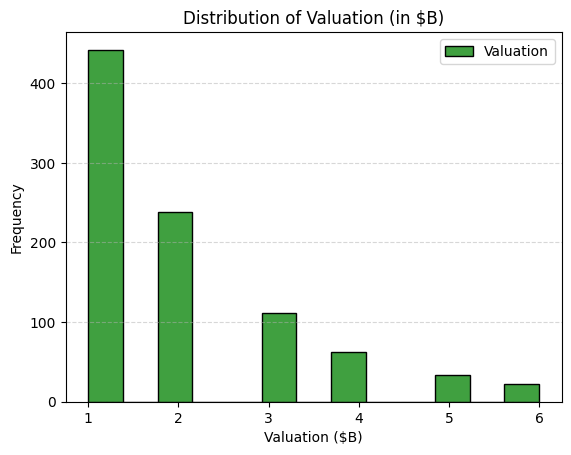

In [ ]:
sns.histplot(companies_df["Valuation"], color="green", label="Valuation")
plt.title('Distribution of Valuation (in $B)')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

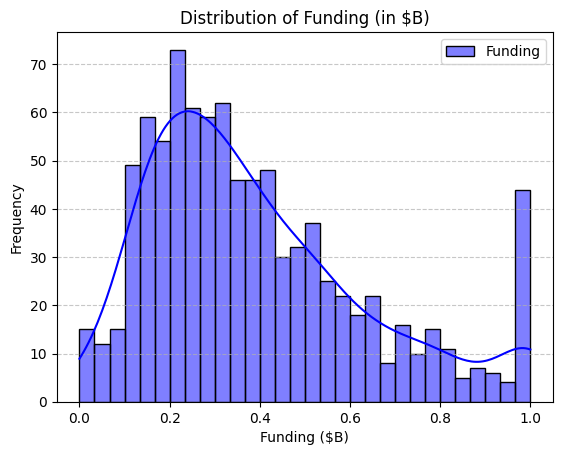

In [ ]:
sns.histplot(companies_df["Funding"], bins=30, kde=True, color="blue", label="Funding")
plt.title('Distribution of Funding (in $B)')
plt.xlabel('Funding ($B)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Industry Analytics

<ipython-input-23-0a6fbc5a3dd3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=industry_counts.index, x=industry_counts.values, palette='husl')


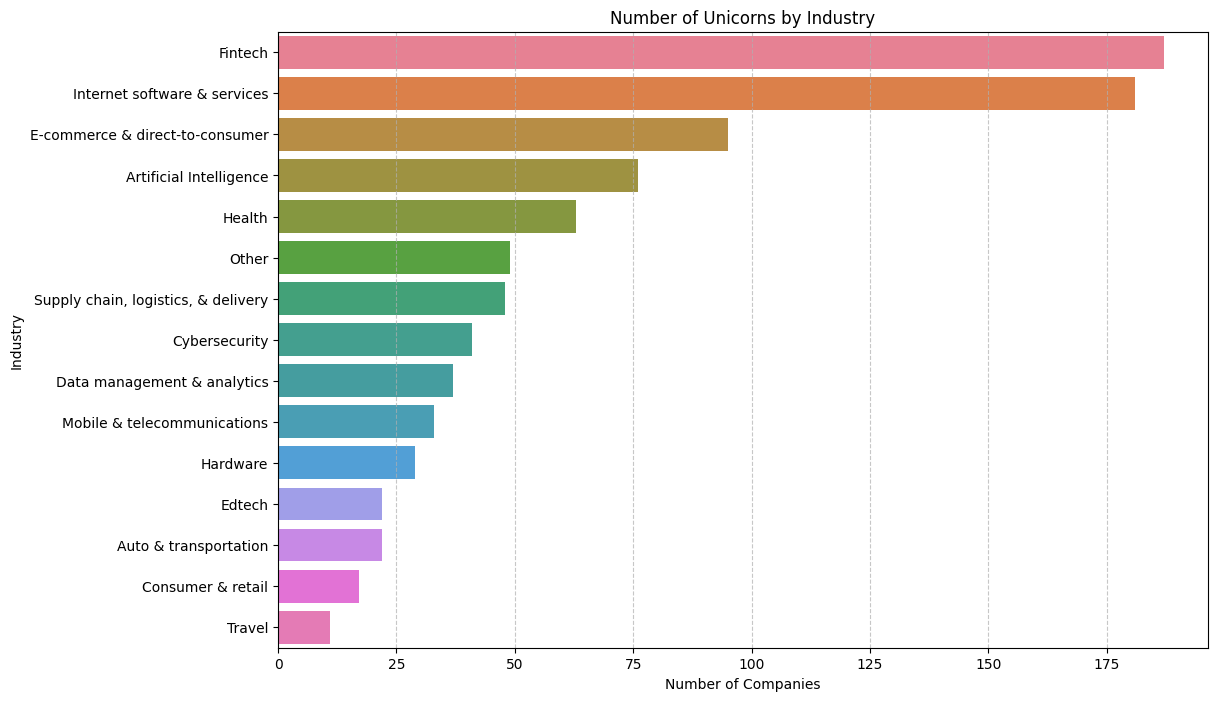

In [ ]:
industry_counts = companies_df["Industry"].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(y=industry_counts.index, x=industry_counts.values, palette='husl')
plt.title('Number of Unicorns by Industry')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-24-04e20e0dd0db>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=industry_counts.index, x=industry_counts.values, palette='husl')


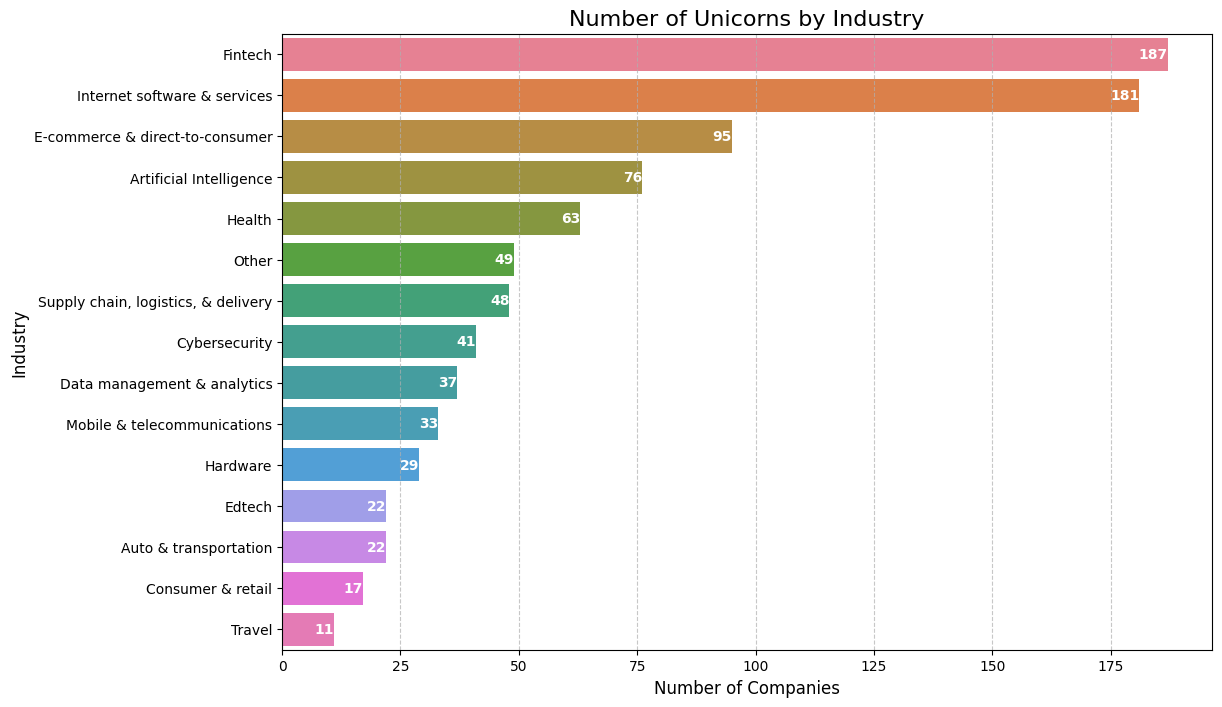

In [ ]:
industry_counts = companies_df['Industry'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(y=industry_counts.index, x=industry_counts.values, palette='husl')

for index, value in enumerate(industry_counts.values):
    plt.text(value, index, str(value), va='center', ha = 'right', color = 'white', fontweight='bold')

plt.title('Number of Unicorns by Industry', fontsize=16)
plt.xlabel('Number of Companies', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Geographic Analysis

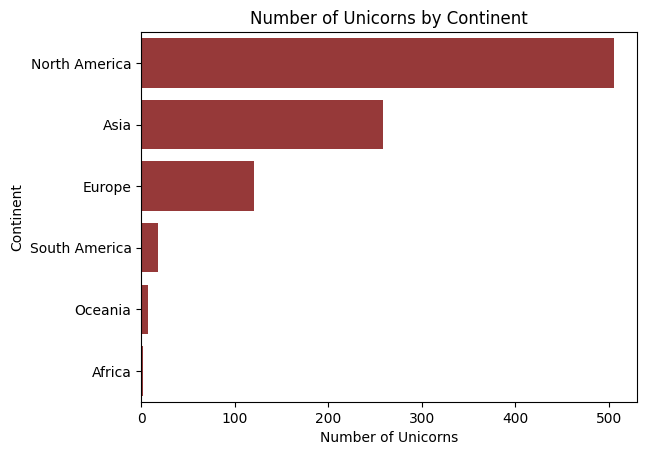

In [ ]:
continent_counts = companies_df['Continent'].value_counts()

sns.barplot(y = continent_counts.index, x = continent_counts.values, color="brown")
plt.title('Number of Unicorns by Continent')
plt.xlabel('Number of Unicorns')
plt.ylabel('Continent')
plt.show()

<ipython-input-26-a1e23932f4bd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=continent_counts.index, x=continent_counts.values, palette='hls')


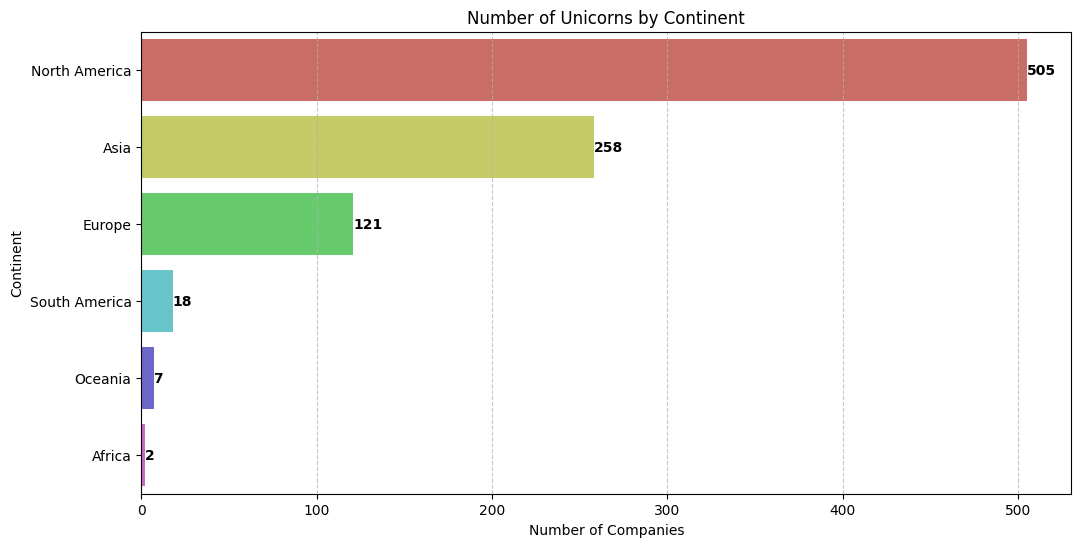

In [ ]:
continent_counts = companies_df['Continent'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(y=continent_counts.index, x=continent_counts.values, palette='hls')

for index, value in enumerate(continent_counts.values):
    plt.text(value, index, str(value), va='center', fontweight='bold', ha = 'left', color = 'black')

plt.title('Number of Unicorns by Continent')
plt.xlabel('Number of Companies')
plt.ylabel('Continent')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

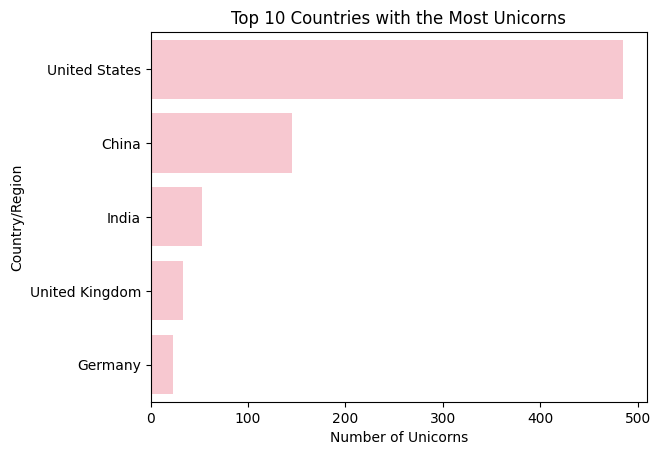

In [ ]:
country_count = companies_df["Country/Region"].value_counts().head()
sns.barplot(y = country_count.index, x = country_count.values, color="pink")
plt.title('Top 10 Countries with the Most Unicorns')
plt.xlabel('Number of Unicorns')
plt.ylabel('Country/Region')
plt.show()

<ipython-input-28-1cfed6f0d0a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_counts.index, x= country_counts.values, palette="tab10")


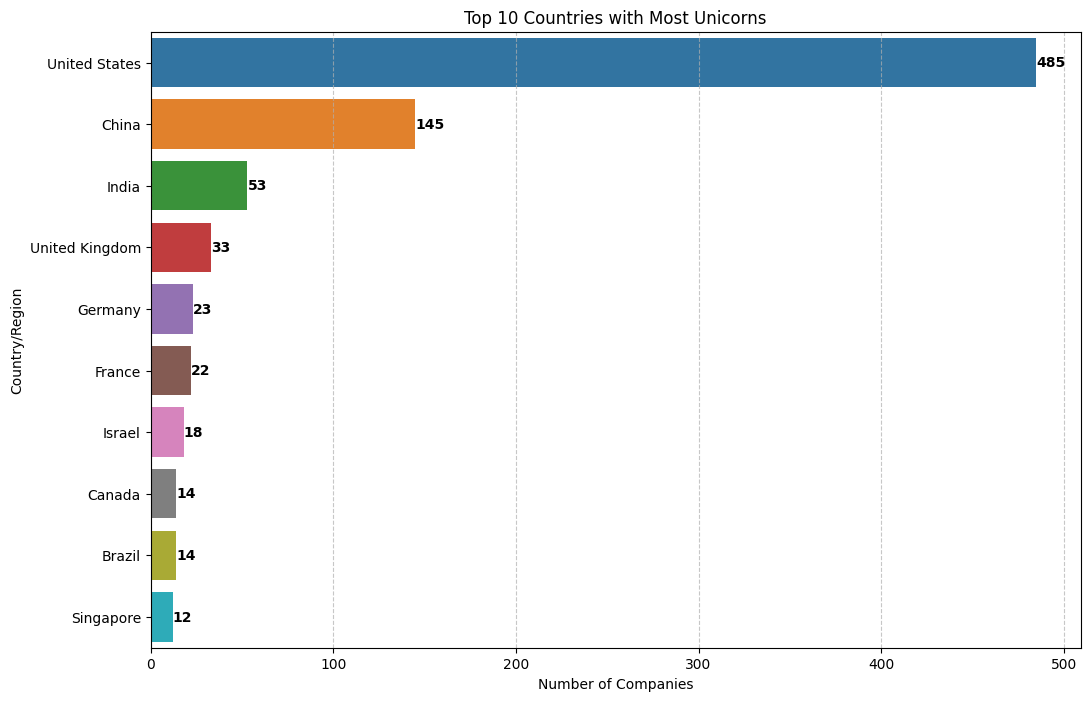

In [ ]:
country_counts = companies_df['Country/Region'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=country_counts.index, x= country_counts.values, palette="tab10")

for index, value in enumerate(country_counts.values):
    plt.text(value, index, str(value), va='center', fontweight='bold')

plt.title('Top 10 Countries with Most Unicorns')
plt.xlabel('Number of Companies')
plt.ylabel('Country/Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Temporal Analysis

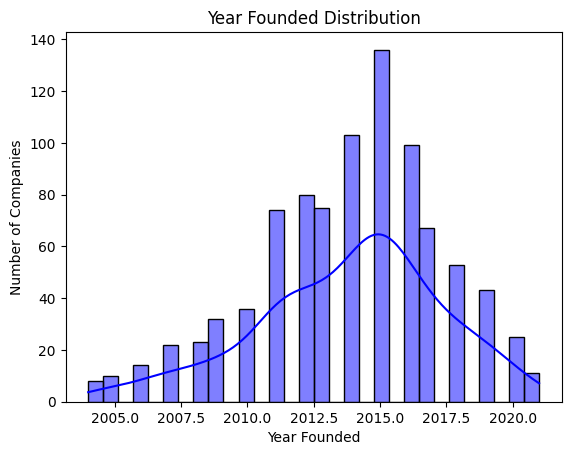

In [ ]:
sns.histplot(companies_df['Year Founded'], bins = 30, kde = True, color = 'blue')
plt.title('Year Founded Distribution')
plt.xlabel('Year Founded')
plt.ylabel('Number of Companies')
plt.show()

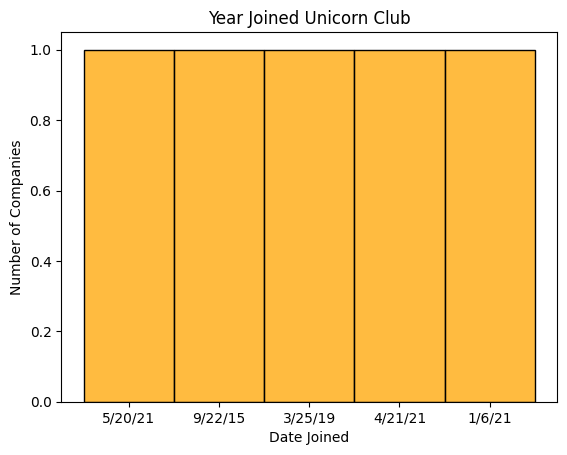

In [ ]:
sns.histplot(companies_df['Date Joined'].head(5), bins = 30, kde = False, color = 'orange')
plt.title('Year Joined Unicorn Club')
plt.xlabel('Date Joined')
plt.ylabel('Number of Companies')
plt.show()